<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day7/HeatingCooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [0]:
df = pd.read_csv('ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [0]:
df = df.drop(columns = ['Unnamed: 10', 'Unnamed: 11'])
df = df.dropna()

In [0]:
from sklearn.model_selection import train_test_split

X = df.drop(['Y1','Y2'],axis=1).values
Y = df[['Y1','Y2']].values

Xtr, Xts, Ytr, Yts = train_test_split(X, Y, test_size=0.1, random_state=42)

print(X)

[[9.800e-01 5.145e+02 2.940e+02 ... 2.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 3.000e+00 0.000e+00 0.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e+00 0.000e+00 0.000e+00]
 ...
 [6.200e-01 8.085e+02 3.675e+02 ... 3.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 4.000e+00 4.000e-01 5.000e+00]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 4.000e-01 5.000e+00]]


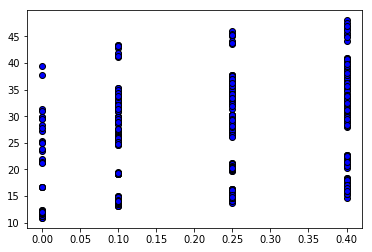

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

x = X[:,6]
y = Y[:,1]

plt.plot(x,y,'ob',markeredgecolor='black')

In [0]:
Xmean = np.mean(Xtr,axis=0)
Xstd  = np.std(Xtr,axis=0)

x_train = (Xtr - Xmean)/Xstd
y_train = Ytr

x_test = (Xts - Xmean)/Xstd
y_test = Yts


In [0]:
print(x_train)

[[ 5.36865510e-01 -6.80857376e-01 -8.12347417e-04 ... -1.36169949e+00
   1.14081657e-01  1.31801375e-01]
 [ 2.05259204e+00 -1.79374312e+00 -5.62144412e-01 ... -1.36169949e+00
   1.23489339e+00 -1.16003905e+00]
 [ 9.15797142e-01 -9.59078811e-01 -5.62144412e-01 ...  4.40856731e-01
  -1.75393789e+00 -1.80595927e+00]
 ...
 [-5.05196477e-01  4.32028364e-01 -1.12347648e+00 ...  4.40856731e-01
  -1.00673007e+00  1.42364181e+00]
 [ 2.05259204e+00 -1.79374312e+00 -5.62144412e-01 ...  1.34213484e+00
   1.14081657e-01  7.77721590e-01]
 [ 1.29472877e+00 -1.23730025e+00 -8.12347417e-04 ...  4.40856731e-01
  -1.00673007e+00 -5.14118840e-01]]


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

tf.keras.backend.clear_session()

nin = x_train.shape[1]
nout = y_train.shape[1]

# hyper-parameters
LAMBDA = 1e-5

model = Sequential(name='NN')
model.add(Dense(1024, activation='relu', input_dim=nin, name='FC1',  kernel_regularizer=l2(LAMBDA)))
model.add(Dense(512, activation='relu', name='FC2',  kernel_regularizer=l2(LAMBDA)))
model.add(Dense(128, activation='relu', name='FC3', kernel_regularizer=l2(LAMBDA)))
model.add(Dense(nout, activation='linear', name='Output', kernel_regularizer=l2(LAMBDA)))

model.summary()

Model: "NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC1 (Dense)                  (None, 1024)              9216      
_________________________________________________________________
FC2 (Dense)                  (None, 512)               524800    
_________________________________________________________________
FC3 (Dense)                  (None, 128)               65664     
_________________________________________________________________
Output (Dense)               (None, 2)                 258       
Total params: 599,938
Trainable params: 599,938
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

VAL_FREQ = 1
## hyperparameters
BATCH_SIZE = 50
EPOCHS = 100

history = model.fit(x_train, y_train,
                   batch_size = BATCH_SIZE,
                   epochs = EPOCHS,
                   validation_split = .2,
                   shuffle = True,
                   validation_freq = VAL_FREQ,
                   verbose = 1)

Train on 552 samples, validate on 139 samples
Epoch 1/100
552/552 [==============================] - 0s 636us/sample - loss: 170.8182 - mean_absolute_error: 10.0335 - val_loss: 123.8580 - val_mean_absolute_error: 8.8244
Epoch 2/100
552/552 [==============================] - 0s 301us/sample - loss: 57.5262 - mean_absolute_error: 5.7337 - val_loss: 35.1291 - val_mean_absolute_error: 4.6934
Epoch 3/100
552/552 [==============================] - 0s 285us/sample - loss: 26.2398 - mean_absolute_error: 3.9270 - val_loss: 21.6805 - val_mean_absolute_error: 3.5499
Epoch 4/100
552/552 [==============================] - 0s 285us/sample - loss: 17.9171 - mean_absolute_error: 3.2640 - val_loss: 17.2960 - val_mean_absolute_error: 3.2511
Epoch 5/100
552/552 [==============================] - 0s 310us/sample - loss: 17.7642 - mean_absolute_error: 3.1625 - val_loss: 22.4789 - val_mean_absolute_error: 3.9161
Epoch 6/100
552/552 [==============================] - 0s 306us/sample - loss: 15.6117 - mean_ab

Text(0.5, 1.0, 'Accuracy vs. Epochs')

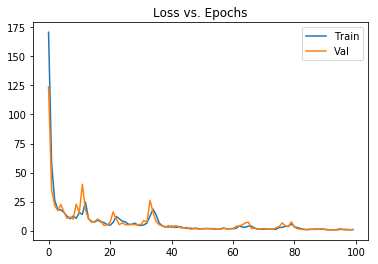

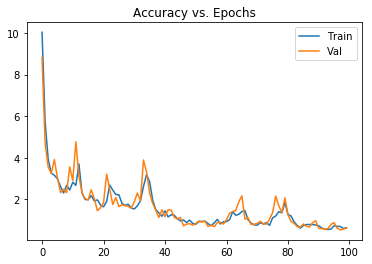

In [0]:
plt.figure()
plt.plot(np.arange(EPOCHS), history.history['loss'])
plt.plot(np.arange(0,EPOCHS,VAL_FREQ), history.history['val_loss'])
plt.legend(['Train', 'Val'])
plt.title('Loss vs. Epochs')

plt.figure()
plt.plot(np.arange(EPOCHS), history.history['mean_absolute_error'])
plt.plot(np.arange(0,EPOCHS,VAL_FREQ), history.history['val_mean_absolute_error'])
plt.legend(['Train', 'Val']);
plt.title('Accuracy vs. Epochs')

In [0]:
yhat = model.predict(x_test)

MAE = np.mean(np.abs(yhat - y_test))
print(MAE)

0.6254726958584477
